In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import wordcloud
from keras.preprocessing import text, sequence
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

Using TensorFlow backend.


In [3]:
from keras import backend as K

K.tensorflow_backend._get_available_gpus()

['/job:localhost/replica:0/task:0/device:GPU:0']

In [0]:
df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/0.Projects/Korean Language Models/petition.csv', encoding='utf-8')

In [5]:
df.head()

article_id  ...                                            content
0          21  ...  스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1          22  ...  현 정부에 국민들이 가장 원하는 것은 부패척결입니다.  우리 사회에 각종 비리들이 ...
2          23  ...  만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
3          24  ...  현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4          25  ...  만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...

[5 rows x 8 columns]

In [6]:
df.shape

(395547, 8)

In [0]:
df = df.drop_duplicates()

In [8]:
df.shape

(395547, 8)

In [0]:
df = df.iloc[:100000, :]

In [10]:
df.shape

(100000, 8)

## title to character level

## content to word level

In [0]:
from sklearn.preprocessing import LabelEncoder

In [0]:
le = LabelEncoder()

In [0]:
df['label'] = le.fit_transform(df['category'])

In [14]:
df.head()

article_id  ... label
0          21  ...     9
1          22  ...     2
2          23  ...     5
3          24  ...    13
4          25  ...     5

[5 rows x 9 columns]

In [0]:
df.drop('article_id', axis=1, inplace=True)
df.drop('start', axis=1, inplace=True)
df.drop('end', axis=1, inplace=True)
df.drop('votes', axis=1, inplace=True)
df.drop('category', axis=1, inplace=True)
df.drop('answered', axis=1, inplace=True)

In [16]:
df.head()

title  ... label
0       스텔라 데이지호에 대한 제안입니다.  ...     9
1            비리제보처를 만들어주세요.  ...     2
2                  제2의 개성공단  ...     5
3  공공기관 무조건적인 정규직전환을 반대합니다.  ...    13
4                  제2의 개성공단  ...     5

[5 rows x 3 columns]

# Data

In [0]:
title = df['title']

content = df['content']

label = df['label']

In [0]:
test_sent = '/as'

In [19]:
pd.Series(test_sent).str.replace('as', '', )

0    /
dtype: object

In [0]:
fucn = ['“', '”', '/', '<', '>', '『', '』', '「', '」', '-', ')', "(", ',', '.', '^', '@', '?', '*', '·']

for i in fucn :
  title = title.str.replace(f'{i}', ' ')


In [0]:
counter = 0
word_list = {}

for i in title:
#   print(i)
  
  for k in i:
    if k not in word_list:
      word_list[k] = 1
    else:
      word_list[k] = word_list[k] + 1
      


In [22]:
word_list

{'스': 4335,
 '텔': 111,
 '라': 5715,
 ' ': 397494,
 '데': 960,
 '이': 31198,
 '지': 39120,
 '호': 6701,
 '에': 14765,
 '대': 28887,
 '한': 16337,
 '제': 14238,
 '안': 5623,
 '입': 5478,
 '니': 29478,
 '다': 33838,
 '비': 4745,
 '리': 7468,
 '보': 10547,
 '처': 4474,
 '를': 10902,
 '만': 4863,
 '들': 9060,
 '어': 7112,
 '주': 26441,
 '세': 22734,
 '요': 28548,
 '2': 2397,
 '의': 18463,
 '개': 6788,
 '성': 6861,
 '공': 7620,
 '단': 3905,
 '기': 12678,
 '관': 6987,
 '무': 8363,
 '조': 9903,
 '건': 4542,
 '적': 5081,
 '인': 13424,
 '정': 13800,
 '규': 3052,
 '직': 3372,
 '전': 7701,
 '환': 1945,
 '을': 16591,
 '반': 10756,
 '합': 17963,
 '복': 1836,
 '부': 12867,
 '령': 4303,
 '3': 1294,
 '9': 444,
 '중': 4699,
 '특': 1401,
 '수': 10019,
 '료': 1833,
 '장': 7302,
 '운': 1792,
 '영': 2407,
 '칙': 110,
 '불': 2734,
 '행': 4087,
 '도': 11665,
 '법': 17717,
 '시': 16760,
 '책': 2866,
 '등': 3387,
 '으': 4785,
 '로': 9751,
 '하': 16979,
 '여': 6592,
 '권': 2961,
 '익': 372,
 '침': 378,
 '해': 23222,
 '되': 2138,
 '구': 5170,
 '김': 1003,
 '헌': 423,
 '재': 5451,
 '소': 

In [23]:
len(word_list)

1942

## Remove puct with regex

In [0]:
import re

In [0]:
pattern = re.compile(pattern = r'[^가-힣A-Za-z]+')

In [0]:
test_sent = '^&*@#@# A S 기사들도 관심을 가져주십시요'

In [27]:
re.sub(pattern, '', test_sent)

'AS기사들도관심을가져주십시요'

In [0]:
def remove_punct(x):
  pattern = re.compile(pattern = r'[^가-힣A-Za-z]+')
  result = re.sub(pattern, '', x)
  return result

In [29]:
title

0                                      스텔라 데이지호에 대한 제안입니다 
1                                           비리제보처를 만들어주세요 
2                                                 제2의 개성공단
3                                 공공기관 무조건적인 정규직전환을 반대합니다 
4                                                 제2의 개성공단
5        보건복지부 부령 제339호중  특수의료장비 운영에 관한 규칙  중  불합리한 행정제...
6                                        김이수 헌재소장 임명 재고 건의
7                                            소액주주를 보호해주십시오
8                                  문재인 정부는 왜 공무원개혁엔 무관심한가 
9                                      A S 기사들도 관심을 가져주십시요
10                       담배 제조 및 매매금지 법안 을 제정해 주시길 부탁드립니다 
11                                  소액주주 보호를 위해 조사요청 드립니다 
12                               납득할 수 있는 장애 재판정을 받고 싶습니다 
13        국가유공자 등 예우 및 지원에 관한법률 상 6 25전몰군경 자녀수당 의 불합리한 ...
14                             문재인정부는 신한국형 페리프로세스가 작성했습니다 
15           한국채식인구 100만명  학교 급식 및 군대에서 현미채식 선택권을 보장해주십시오!
16                                   황우석박사님 연구재개 허용 촉구합니

In [0]:
title = title.apply(remove_punct)

In [31]:
title

0                                          스텔라데이지호에대한제안입니다
1                                             비리제보처를만들어주세요
2                                                   제의개성공단
3                                     공공기관무조건적인정규직전환을반대합니다
4                                                   제의개성공단
5        보건복지부부령제호중특수의료장비운영에관한규칙중불합리한행정제도법령시책등으로인하여권리이익...
6                                            김이수헌재소장임명재고건의
7                                             소액주주를보호해주십시오
8                                       문재인정부는왜공무원개혁엔무관심한가
9                                          AS기사들도관심을가져주십시요
10                                담배제조및매매금지법안을제정해주시길부탁드립니다
11                                       소액주주보호를위해조사요청드립니다
12                                      납득할수있는장애재판정을받고싶습니다
13                   국가유공자등예우및지원에관한법률상전몰군경자녀수당의불합리한문제점개선청원
14                                 문재인정부는신한국형페리프로세스가작성했습니다
15                        한국채식인구만명학교급식및군대에서현미채식선택권을보장해주십시오
16                                       황우석박사님연구재개허용촉구합

# create title char dictionary

In [0]:
full_title = title.values.tolist()

In [33]:
test_list = []
for i in full_title[0]:
  print(i)
  test_list.append(i)
  
print(test_list)

스
텔
라
데
이
지
호
에
대
한
제
안
입
니
다
['스', '텔', '라', '데', '이', '지', '호', '에', '대', '한', '제', '안', '입', '니', '다']


In [34]:
full_char = {}
counter = 0
test_list = []
for i in full_title:
  for k in i:
    test_list.append(k)

    if k not in full_char:
      full_char[k] = 1
    else:
      full_char[k] = full_char[k] +1 

#   counter += 1
#   if counter ==5:
#     break
    
# test_list
print(len(full_char))
full_char

1629


{'스': 4335,
 '텔': 111,
 '라': 5715,
 '데': 960,
 '이': 31198,
 '지': 39120,
 '호': 6701,
 '에': 14765,
 '대': 28887,
 '한': 16337,
 '제': 14238,
 '안': 5623,
 '입': 5478,
 '니': 29478,
 '다': 33838,
 '비': 4745,
 '리': 7468,
 '보': 10547,
 '처': 4474,
 '를': 10902,
 '만': 4863,
 '들': 9060,
 '어': 7112,
 '주': 26441,
 '세': 22734,
 '요': 28548,
 '의': 18463,
 '개': 6788,
 '성': 6861,
 '공': 7620,
 '단': 3905,
 '기': 12678,
 '관': 6987,
 '무': 8363,
 '조': 9903,
 '건': 4542,
 '적': 5081,
 '인': 13424,
 '정': 13800,
 '규': 3052,
 '직': 3372,
 '전': 7701,
 '환': 1945,
 '을': 16591,
 '반': 10756,
 '합': 17963,
 '복': 1836,
 '부': 12867,
 '령': 4303,
 '중': 4699,
 '특': 1401,
 '수': 10019,
 '료': 1833,
 '장': 7302,
 '운': 1792,
 '영': 2407,
 '칙': 110,
 '불': 2734,
 '행': 4087,
 '도': 11665,
 '법': 17717,
 '시': 16760,
 '책': 2866,
 '등': 3387,
 '으': 4785,
 '로': 9751,
 '하': 16979,
 '여': 6592,
 '권': 2961,
 '익': 372,
 '침': 378,
 '해': 23222,
 '되': 2138,
 '구': 5170,
 '김': 1003,
 '헌': 423,
 '재': 5451,
 '소': 21359,
 '임': 3456,
 '명': 12134,
 '고': 11349,
 '액'

In [35]:
test_list

['스',
 '텔',
 '라',
 '데',
 '이',
 '지',
 '호',
 '에',
 '대',
 '한',
 '제',
 '안',
 '입',
 '니',
 '다',
 '비',
 '리',
 '제',
 '보',
 '처',
 '를',
 '만',
 '들',
 '어',
 '주',
 '세',
 '요',
 '제',
 '의',
 '개',
 '성',
 '공',
 '단',
 '공',
 '공',
 '기',
 '관',
 '무',
 '조',
 '건',
 '적',
 '인',
 '정',
 '규',
 '직',
 '전',
 '환',
 '을',
 '반',
 '대',
 '합',
 '니',
 '다',
 '제',
 '의',
 '개',
 '성',
 '공',
 '단',
 '보',
 '건',
 '복',
 '지',
 '부',
 '부',
 '령',
 '제',
 '호',
 '중',
 '특',
 '수',
 '의',
 '료',
 '장',
 '비',
 '운',
 '영',
 '에',
 '관',
 '한',
 '규',
 '칙',
 '중',
 '불',
 '합',
 '리',
 '한',
 '행',
 '정',
 '제',
 '도',
 '법',
 '령',
 '시',
 '책',
 '등',
 '으',
 '로',
 '인',
 '하',
 '여',
 '권',
 '리',
 '이',
 '익',
 '이',
 '침',
 '해',
 '되',
 '어',
 '시',
 '정',
 '요',
 '구',
 '시',
 '정',
 '을',
 '요',
 '구',
 '합',
 '니',
 '다',
 '김',
 '이',
 '수',
 '헌',
 '재',
 '소',
 '장',
 '임',
 '명',
 '재',
 '고',
 '건',
 '의',
 '소',
 '액',
 '주',
 '주',
 '를',
 '보',
 '호',
 '해',
 '주',
 '십',
 '시',
 '오',
 '문',
 '재',
 '인',
 '정',
 '부',
 '는',
 '왜',
 '공',
 '무',
 '원',
 '개',
 '혁',
 '엔',
 '무',
 '관',
 '심',
 '한',
 '가',
 'A',
 'S'

In [36]:
title

0                                          스텔라데이지호에대한제안입니다
1                                             비리제보처를만들어주세요
2                                                   제의개성공단
3                                     공공기관무조건적인정규직전환을반대합니다
4                                                   제의개성공단
5        보건복지부부령제호중특수의료장비운영에관한규칙중불합리한행정제도법령시책등으로인하여권리이익...
6                                            김이수헌재소장임명재고건의
7                                             소액주주를보호해주십시오
8                                       문재인정부는왜공무원개혁엔무관심한가
9                                          AS기사들도관심을가져주십시요
10                                담배제조및매매금지법안을제정해주시길부탁드립니다
11                                       소액주주보호를위해조사요청드립니다
12                                      납득할수있는장애재판정을받고싶습니다
13                   국가유공자등예우및지원에관한법률상전몰군경자녀수당의불합리한문제점개선청원
14                                 문재인정부는신한국형페리프로세스가작성했습니다
15                        한국채식인구만명학교급식및군대에서현미채식선택권을보장해주십시오
16                                       황우석박사님연구재개허용촉구합

In [0]:
full_title = title.to_list()

In [0]:
full_list = []
for i in full_title:
  char_list = []
  for char in i:
    char_list.append(char)
  full_list.append(char_list)

In [0]:
title_token = text.Tokenizer()

title_token.fit_on_texts(full_list)

title_numeric = title_token.texts_to_sequences(full_list)

In [40]:
len(title_token.index_word)

1603

In [0]:
title_data = sequence.pad_sequences(title_numeric, maxlen=1000, padding='post')

In [42]:
title_data

array([[ 94, 544,  68, ...,   0,   0,   0],
       [ 88,  52,  27, ...,   0,   0,   0],
       [ 27,  16,  59, ...,   0,   0,   0],
       ...,
       [ 62,  35, 147, ...,   0,   0,   0],
       [ 34, 168, 121, ...,   0,   0,   0],
       [ 35, 278,   3, ...,   0,   0,   0]], dtype=int32)

# content

In [43]:
content

0        스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1        현 정부에 국민들이 가장 원하는 것은 부패척결입니다.  우리 사회에 각종 비리들이 ...
2        만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
3        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4        만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
5        청원인  왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
6        문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...
7        **  존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
8        살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...
9        안녕하세요. 저는 LG전자 서비스센터에서 근무하고 있는 서비스 기사입니다. 이곳에 ...
10       안녕하세요 대통령님\n금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어...
11       존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...
12       안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...
13       (현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
14       문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다.\n<신한국형 페리 프로세...
15       문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
16       국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월.

In [0]:
def remove_punct2(x):
  pattern = re.compile(pattern = r'[^가-힣A-Za-z0-9\\s]+')
  result = re.sub(pattern, ' ', x)
  return result

In [0]:
content_pre = content.astype('str').apply(lambda x: str(x)).apply(remove_punct2)

In [0]:
content_pre = content_pre.str.replace('\\\\n', ' ')

In [47]:
content_pre

0        스텔라 데이지호에 대한 제안입니다  3월31일 스텔라 데이지호가 침몰하고 5달째가 ...
1        현 정부에 국민들이 가장 원하는 것은 부패척결입니다 우리 사회에 각종 비리들이 많은...
2        만일 하시는 대통령님 및 각 부처 장관님 주무관님들 안녕하세요  전남 목포에서 자영...
3        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다 그런데 공공기관 비정규직들은 인맥...
4        만일 하시는 대통령님 및 각 부처 장관님 주무관님들 안녕하세요  전남 목포에서 자영...
5        청원인 왕 기 운 서울 도봉구 창동 삼성아파트 101 1103호 청원취지 보건복지부...
6        문 대통령님께 묻습니다 2017 8 19  저는 경기도 용인에 살고 있는 국민입니다...
7         존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주주입니...
8        살충제 계란 사건으로 국민들을 불안케 하고 있다  원인이 무엇인가 살충제를 뿌린 양...
9        안녕하세요 저는 LG전자 서비스센터에서 근무하고 있는 서비스 기사입니다 이곳에 이런...
10       안녕하세요 대통령님 금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어들...
11       존경하는 대통령님께  코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사의 ...
12       안녕하십니까 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다 합창 시절 ...
13        현황  우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊은...
14       문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다   신한국형 페리 프로세스...
15       문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다 대한민국의...
16       국민의 70 이상이 황우석박사님을 응원하고 지지하고 있습니다   2007년 1월 중.

In [0]:
def remove_space(x):
  pattern = re.compile(r'^[ \\t]+|[ \\t]+$')
  return re.sub(pattern, '', x)

In [49]:
!pip install konlpy==0.4.5

     |████████████████████████████████| 19.4MB 2.7MB/s 
     |████████████████████████████████| 92kB 24.4MB/s 
  Created wheel for konlpy: filename=konlpy-0.4.5-py2.py3-none-any.whl size=19433922 sha256=3a5bda4159f1be6dc49d748ee5a7b9f9dc90e6fa02caa3cf20b1509c63a1be06
  Stored in directory: /root/.cache/pip/wheels/c8/bd/c8/429533fe4030611e76ffb278c62a5382e9a6803c18f7ae2ed0
  Created wheel for JPype1-py3: filename=JPype1_py3-0.5.5.4-cp36-cp36m-linux_x86_64.whl size=2655706 sha256=35547a5565514b1f7e51e9f4a74368af969fe7c47bfab9c48789abd6ce132910
  Stored in directory: /root/.cache/pip/wheels/52/37/1f/1015d908d12a0e9b239543d031fda0cded9823aa1306939541
Successfully built konlpy JPype1-py3


제 경우는 komoran을 썼는데 패키지 코드를 보니까 phrase.split('\n') 방식으로 나누는 부분이 있다는 것에 착안해서 미리 pos()함수에 대량의 텍스트를 넣게 전에 re.sub('\n+', "\n", text)같은 처리와 .split('\n')로 문장별로 나눈 뒤에

In [0]:
from konlpy.tag import Komoran, Kkma, Okt

In [0]:
komo = Komoran()
kkma = Kkma()
okt = Okt()

In [52]:
import konlpy 
konlpy.__version__

'0.4.5'

In [0]:
content_morph = {}
counter = 0

for inds, i in enumerate(content_pre):
#   print(inds, i.lstrip())
  morph = okt.nouns(i)
#   print(morph)
  content_morph[inds] = morph
  
#   counter += 1
#   if counter == 10:
#     break

In [60]:
content_morph

{0: ['스텔라',
  '데이지',
  '대한',
  '제안',
  '스텔라',
  '데이지',
  '호가',
  '침몰',
  '달',
  '저',
  '우리',
  '일찍',
  '포기',
  '것',
  '생각',
  '추후',
  '이',
  '사고',
  '대한',
  '해결',
  '나중',
  '문재인',
  '정부',
  '부담',
  '수도',
  '생각',
  '이',
  '글',
  '가족',
  '지금',
  '희망',
  '발견',
  '명벌',
  '땟목',
  '선원',
  '생존',
  '훈련',
  '선원',
  '대부분',
  '명벌',
  '지붕',
  '생존',
  '도구',
  '구비',
  '때문',
  '기간',
  '수',
  '거',
  '이전',
  '정권',
  '대선',
  '이전',
  '수색',
  '중단',
  '탓',
  '정권',
  '교체',
  '후',
  '재',
  '수색',
  '태평양',
  '수심',
  '데',
  '애초',
  '우리',
  '마음속',
  '일찍',
  '포기',
  '게',
  '생각',
  '듭니',
  '멕시코',
  '개월',
  '동안',
  '표류',
  '구조',
  '어부',
  '과태',
  '요트',
  '전복',
  '태평양',
  '표류',
  '부부',
  '한국',
  '어선',
  '구조',
  '일도',
  '명벌',
  '때',
  '포기',
  '생각',
  '구명',
  '벌이',
  '침몰',
  '당시',
  '분리',
  '것',
  '확인',
  '선박',
  '침몰',
  '원인',
  '찾기',
  '위',
  '심해',
  '탐사',
  '수',
  '장비',
  '통한',
  '수색',
  '생각',
  '선박',
  '침몰',
  '대해',
  '선사',
  '노후',
  '선박',
  '개조',
  '사전',
  '균열',
  '등',
  '의혹',
  '제기',
  '상황',
  '구명',
  '벌이',
  '선박

In [61]:
df.shape

(100000, 3)

In [62]:
len(content_morph)

100000

In [0]:
content_df = pd.DataFrame(content_morph.items())

In [64]:
content

0        스텔라 데이지호에 대한 제안입니다.\n3월31일 스텔라 데이지호가 침몰하고 5달째가...
1        현 정부에 국민들이 가장 원하는 것은 부패척결입니다.  우리 사회에 각종 비리들이 ...
2        만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
3        현정부에서 정규직 일자리를 늘리는 것에 찬성합니다. 그런데 공공기관 비정규직들은 인...
4        만일 하시는 대통령님 및 각 부처 장관님,주무관님들 안녕하세요!!\n전남 목포에서 ...
5        청원인  왕 기 운\n서울 도봉구 창동 삼성아파트 101-1103호\n청원취지\n보...
6        문 대통령님께 묻습니다 (2017. 8. 19)\n저는 경기도 용인에 살고 있는 국...
7        **  존경하옵는 문재인대통령님께\n저는 중국원양자원이라는 KOSPI상장사의 소액 ...
8        살충제 계란 사건으로 국민들을 불안케 하고 있다.\n원인이 무엇인가? 살충제를 뿌린...
9        안녕하세요. 저는 LG전자 서비스센터에서 근무하고 있는 서비스 기사입니다. 이곳에 ...
10       안녕하세요 대통령님\n금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어...
11       존경하는 대통령님께,\n코스피 주식종목 중국 원양자원은 현재 계속되는 장** 대표이...
12       안녕하십니까? 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다. 합창 시...
13       (현황)\n우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊...
14       문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다.\n<신한국형 페리 프로세...
15       문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다. 대한민국...
16       국민의 70% 이상이 황우석박사님을 응원하고 지지하고 있습니다.\n*2007년 1월.

In [0]:
content_df_full = pd.merge(content_df, content_pre, how='inner', left_index=True, right_index=True)

In [66]:
content_df_full

0  ...                                            content
0          0  ...  스텔라 데이지호에 대한 제안입니다  3월31일 스텔라 데이지호가 침몰하고 5달째가 ...
1          1  ...  현 정부에 국민들이 가장 원하는 것은 부패척결입니다 우리 사회에 각종 비리들이 많은...
2          2  ...  만일 하시는 대통령님 및 각 부처 장관님 주무관님들 안녕하세요  전남 목포에서 자영...
3          3  ...  현정부에서 정규직 일자리를 늘리는 것에 찬성합니다 그런데 공공기관 비정규직들은 인맥...
4          4  ...  만일 하시는 대통령님 및 각 부처 장관님 주무관님들 안녕하세요  전남 목포에서 자영...
5          5  ...  청원인 왕 기 운 서울 도봉구 창동 삼성아파트 101 1103호 청원취지 보건복지부...
6          6  ...  문 대통령님께 묻습니다 2017 8 19  저는 경기도 용인에 살고 있는 국민입니다...
7          7  ...   존경하옵는 문재인대통령님께 저는 중국원양자원이라는 KOSPI상장사의 소액 주주입니...
8          8  ...  살충제 계란 사건으로 국민들을 불안케 하고 있다  원인이 무엇인가 살충제를 뿌린 양...
9          9  ...  안녕하세요 저는 LG전자 서비스센터에서 근무하고 있는 서비스 기사입니다 이곳에 이런...
10        10  ...  안녕하세요 대통령님 금연 관련 정책들이 강화되고 있지만 여전히 흡연자의 수는 줄어들...
11        11  ...  존경하는 대통령님께  코스피 주식종목 중국 원양자원은 현재 계속되는 장 대표이사의 ...
12        12  ...  안녕하십니까 저는 경직형 양마비 뇌병변 장애를 가진 장애 대학생 입니다 합창 시절 ...
13        13  ...   현황  우리들 아버지께서는 67여년전 북의 남침으로 조국이 위기에 처했을 때 젊은...
14        14  ...  문재인 대통령님 신한국형 페리프로세스 로드맵작성 했습니다   신한국형 페리 프로세스...
15        15  ...  문재인 대통령님과 각 정부 인사분들께 마음속 깊이 존경과 감사를 표합니다 대한민국의...
16        16  ...  국민의 70 이상이 황우석박사님을 응원하고 지지하고 있습니다   2007년 1월 중...
17        17  ...  문재인 대통령님 한중관계 사드 갈등 해소방법 찾았습니다  시진핑 주석 한테 이렇게 ...
18        18  ...  지금부터 67년전 1950년 6 25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...
19        19  ...  지금부터 67년전 1950년 6 25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...
20        20  ...  대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
21        21  ...  대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
22        22  ...  광주 과학고등학교에서 학생들을 인솔하여 해외 프로그램을 다녀왔는데 인솔교사에게 시간...
23        23  ...  초등학교 교사 임용 시험을 수능 시험 처럼 전국 단위로 실시하고난 후에 1지망 2지...
24        24  ...  대통령님 안녕하세요 저는 임용을 준비하고 수험생입니다 처음 기간제 정규직화 된다고 ...
25        25  ...  지금부터 67년전 1950년 6 25전쟁때 조국 대한민국이 위태로운 시점에 우리들 ...
26        26  ...  존경하는 문재인 대통령님 앞으로 1년 반 뒤인 2019년 3월 1일은 대한민국이 독...
27        27  ...  문재인대통령과 교육부장관님  교사 정규직은 임용고시라는 제도를 통해 정교사가 될 수...
28        28  ...  안녕하십니까 대통령님 간단하게 제소개 부터 하겠습니다 저는 치위생과 3학년 학생입니...
29        29  ...  국내 증시에 상장한 중국 기업들의 현황과 문제점을 설명하고 더 이상의 개인투자자 피...
...      ...  ...                                                ...
99970  99970  ...  안녕하십니까  우리국민이 안전하게 먹을수 있는 음식들을 표시를 제대로 하지를 않으니...
99971  99971  ...  정부가 그리도 할일이 없더냐 맨날 대형사고만 발생하냐  가상화폐가 도박이냐  정부가...
99972  99972  ...  평창동계올림픽 출전의 꿈이 대한빙상경기연맹 착오로 물거품이 될뻐난 노선영 29 콜핑...
99973  99973  ...  다중이용시설 이나 특히 병원은 시설규제를 강화하고 요양병원은 강화된 소방법 적용시켜...
99974  99974  ...  중앙부처에서 어떤 업무가 내려오면 광역지자체는 그걸 그대로 기초 지자체에 보냅니다 ...
99975  99975  ...  청와대는 국민청원하는 이 게시판 관리를 좀 해주셨으면 좋겟네요 아무 의미도 없는 글...
99976  99976  ...  여자 알파인 스키 국가대표 선수 세 명은 2월 개막하는 평창동계올림픽을 앞두고 추운...
99977  99977  ...  세이프 가드  황당한 지금의 현실  이제 우리도 대한민국 우선주의 를 내세워야 할 ...
99978  99978  ...  알파인 스키대표팀 엔트리 논란이 확대 조짐을 보이고 있다 탈락한 경성현 28 의 소...
99979  99979  ...  존경하는 대통령님 안녕하세요  요즘 밀양병원화재 사건으로 바쁘시죠  하지만 저는 일...
99980  99980  ...  평창올림픽의 수익은 평창과 강원도민과 강원경제에서도 마땅히 거두어야 합니다 그런데 ...
99981  99981  ...  아버지를 둔 딸로써 안타까운 마음에 청원드립니다 일자리가 없어지는 것도 큰 문제이고...
99982  99982  ...  범죄조직 당진흥신소와 그 업주는 해킹조직과 결합하여 사이버흥신소 로 진화하는데  경...
99983  99983  ...  저의 청원 글을 잘 참고하시기 바랍니다 20337 외교 20634 외교 20359 ...
99984  99984  ...  안녕하세요  가정 어린이집을 운영하고 있는 원장입니다  해가 바뀌고 교사들에게 급여...
99985  99985  ...  안녕하십니까 올해 27살 요양병원에서 근무하는 근무자입니다  이번 밀양 세종병원 화...
99986  99986  ...  1 27일 연합뉴보도에 따르면  조명균 통일부 장관이 평창올림픽 개막식 하루 전에 ...
99987  99987  ...  여러 사건사고가 일어날때마다 정부에서는 하는 말이 앞으로 이러한 일이 일어나지 않도...
99988  99988  ...  현기차 사태 잘 아실겁니다 밀양 화재 사건 장성요양사건 충북제천 휘트니스사건 의정부...
99989  99989  ...  이 청원자는 정의를 지향하는 천주교인이고 세례명은 남종삼세례자요한 입니다  일간베스...
99990  99990  ...  안녕하세요 사유가 있어 검정고시를 보게된 힉생입니다 근데 정시를 줄이다니요 솔직히 ...
99991  99991  ...  안녕하세요  가정 어린이집을 운영하고 있는 원장입니다  해가 바뀌고 교사들에게 급여...
99992  99992  ...  안녕하세요  가정 어린이집을 운영하고 있는 원장입니다  해가 바뀌고 교사들에게 급여...
99993  99993  ...  저는 진실한 하나님을 찾지 거짓된 하나님을 찾지않습니다 신천지는 하나의 종교가 아닌...
99994  99994  ...  홍준표는사퇴해야합니다 보수재1야당홍준표는망언과막말발언이도가지나쳐국민들을분노하게하고있...
99995  99995  ...  회사로부터 정당한 사유 없이 부당해고를 당했을 경우 물론 근로기준 현행법상 부당해고...
99996  99

In [0]:
content_df = content_df_full[1].tolist()

In [68]:
content_df 

[['스텔라',
  '데이지',
  '대한',
  '제안',
  '스텔라',
  '데이지',
  '호가',
  '침몰',
  '달',
  '저',
  '우리',
  '일찍',
  '포기',
  '것',
  '생각',
  '추후',
  '이',
  '사고',
  '대한',
  '해결',
  '나중',
  '문재인',
  '정부',
  '부담',
  '수도',
  '생각',
  '이',
  '글',
  '가족',
  '지금',
  '희망',
  '발견',
  '명벌',
  '땟목',
  '선원',
  '생존',
  '훈련',
  '선원',
  '대부분',
  '명벌',
  '지붕',
  '생존',
  '도구',
  '구비',
  '때문',
  '기간',
  '수',
  '거',
  '이전',
  '정권',
  '대선',
  '이전',
  '수색',
  '중단',
  '탓',
  '정권',
  '교체',
  '후',
  '재',
  '수색',
  '태평양',
  '수심',
  '데',
  '애초',
  '우리',
  '마음속',
  '일찍',
  '포기',
  '게',
  '생각',
  '듭니',
  '멕시코',
  '개월',
  '동안',
  '표류',
  '구조',
  '어부',
  '과태',
  '요트',
  '전복',
  '태평양',
  '표류',
  '부부',
  '한국',
  '어선',
  '구조',
  '일도',
  '명벌',
  '때',
  '포기',
  '생각',
  '구명',
  '벌이',
  '침몰',
  '당시',
  '분리',
  '것',
  '확인',
  '선박',
  '침몰',
  '원인',
  '찾기',
  '위',
  '심해',
  '탐사',
  '수',
  '장비',
  '통한',
  '수색',
  '생각',
  '선박',
  '침몰',
  '대해',
  '선사',
  '노후',
  '선박',
  '개조',
  '사전',
  '균열',
  '등',
  '의혹',
  '제기',
  '상황',
  '구명',
  '벌이',
  '선박',


In [0]:
content_token = text.Tokenizer(num_words=10000)

content_token.fit_on_texts(content_df)

In [70]:
len(content_token.index_word)

63037

In [0]:
content_val = content_token.texts_to_sequences(content_df)

In [0]:
del content
del content_df
del content_df_full
del content_morph
del content_pre

In [0]:
import gc
gc.collect()

In [0]:
# pad_len_result = []
# for i in content_val:
#   len_result = len(i)
#   pad_len_result.append(len_result)
  
# np.max(np.array(pad_len_result))

In [0]:
content_pad = sequence.pad_sequences(content_val, maxlen = 20000, padding='post')

## set the train and test data

In [0]:
label.shape

In [0]:
content_pad.shape

In [0]:
title_data.shape

In [0]:
from keras.utils import to_categorical
from keras import models, layers

In [0]:
label = to_categorical(label)

In [75]:
label.shape

(100000, 17)

In [0]:
title_input = layers.Input(shape = (1000,))
title_emb = layers.Embedding(1746+1, 100)(title_input)
title_x = layers.Conv1D(64, 7, activation='relu')(title_emb)
title_x = layers.LSTM(64)(title_x)



content_input = layers.Input(shape = (20000,))
content_emb = layers.Embedding(10000+1, 100)(content_input)
content_x = layers.Conv1D(64, 7, activation='relu')(content_emb)
content_x = layers.Bidirectional(layers.LSTM(64, return_sequences=True))(content_x)
content_x = layers.Bidirectional(layers.LSTM(32))(content_x)

concat = layers.Concatenate()([title_x, content_x])

x = layers.Dense(128, activation='relu')(concat)
x = layers.Dense(17, activation='softmax')(x)

In [0]:
model = models.Model([title_input, content_input], x)

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['acc'])

In [0]:
from keras.utils import plot_model

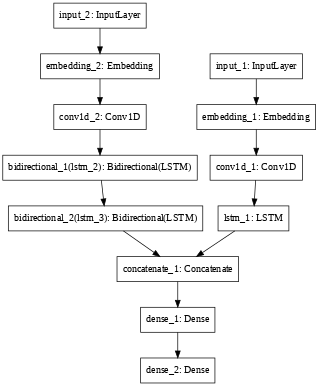

In [79]:
plot_model(model, 'model.png', dpi=50)

In [0]:
model.fit([title_data, content_pad], label, batch_size=32, epochs=100)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Epoch 1/100
